In [48]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/gdriveupmebot/archive.zip" -d "/tmp/data"

In [ ]:
!pip install split_folders

In [127]:
import os
import numpy as np
from PIL import Image
from matplotlib.image import imread
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import splitfolders as sf

In [93]:
head_dir="/tmp/data"

In [94]:
print("Number of pictures")
for dir in os.listdir(head_dir):
  print(dir+": "+ str(len(os.listdir(head_dir+"/"+dir))))


Number of pictures
COVID: 1252
non-COVID: 1229


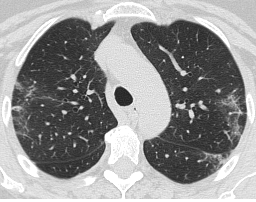

In [95]:
Image.open("/tmp/data/COVID/Covid (1).png")

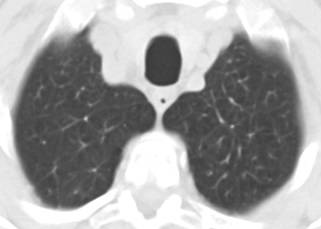

In [96]:
Image.open("/tmp/data/non-COVID/Non-Covid (1).png")

In [97]:
sample=Image.open("/tmp/data/non-COVID/Non-Covid (1).png")
sample.size

(321, 229)

In [98]:
sample.mode

'RGBA'

In [99]:
width=[]
height=[]

for dir in os.listdir(head_dir+"/COVID"):
  width_temp,height_temp=Image.open(head_dir+"/COVID/"+dir).size
  width.append(width_temp)
  height.append(height_temp)

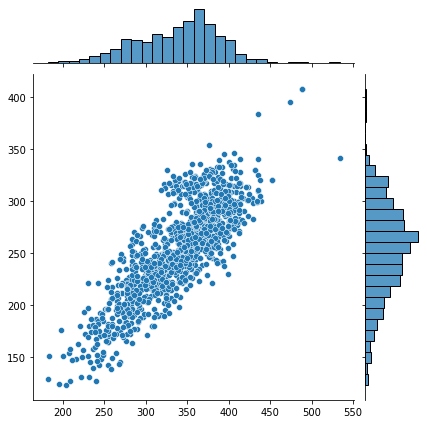

In [100]:
sns.jointplot(x=width,y=height)

In [113]:
print(sum(width)/len(width))
print(sum(height)/len(height))

362.6859235150529
267.2262001627339


In [102]:
width=[]
height=[]

for dir in os.listdir(head_dir+"/non-COVID"):
  width_temp,height_temp=Image.open(head_dir+"/non-COVID/"+dir).size
  width.append(width_temp)
  height.append(height_temp)

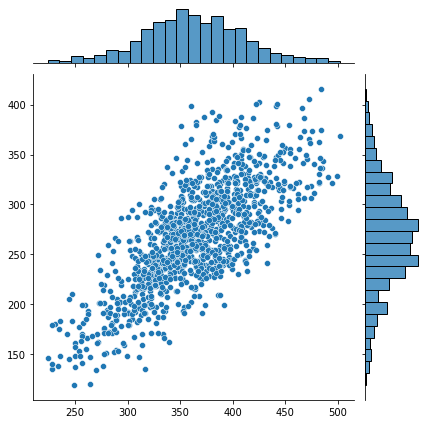

In [103]:
sns.jointplot(x=width,y=height)

In [104]:
print(sum(width)/len(width))
print(sum(height)/len(height))

362.6859235150529
267.2262001627339


In [105]:
sf.ratio(head_dir, "/tmp/new data")

Copying files: 2481 files [00:01, 2125.17 files/s]


In [106]:
head_dir="/tmp/new data"

In [107]:
train=head_dir+"/train"
test=head_dir+"/test"
val=head_dir+"/val"

In [108]:
generate= ImageDataGenerator(vertical_flip=True,
                             rotation_range=10,
                             width_shift_range=.1,
                             height_shift_range=.1,
                             rescale=1/255)

In [109]:
train=generate.flow_from_directory(train,target_size=(350,260),color_mode="rgba",shuffle=True)
test=generate.flow_from_directory(test,target_size=(350,260),color_mode="rgba",shuffle=False)
val=generate.flow_from_directory(val,target_size=(350,260),color_mode="rgba",shuffle=False)

Found 1984 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


In [110]:
es=EarlyStopping(patience=2)

In [136]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(Dropout(0.5))
model.add(Conv2D(528, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train,validation_data=val, callbacks=[es])

62/62 [==============================] - 96s 2s/step - loss: 4.9867 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [117]:
import pandas
history=pandas.DataFrame(model.history.history)

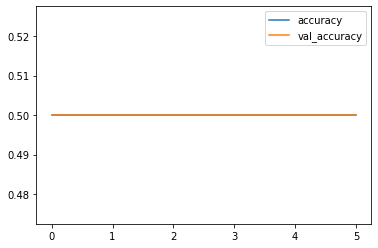

In [119]:
history[["accuracy","val_accuracy"]].plot()